In [3]:
import lal

In [4]:
def make_list_hv(file):
    list_hv = []
    with open(file, 'r') as f:
        data = []
        for line in f:
            if line[0] == '#':
                pass
            elif line == '\n':
                hv = list(map(lambda l: int(l.split('\t')[6]), data))
                list_hv.append(hv)
                data = []
            else:
                data.append(line[:-1])
        if len(data) > 0:
            hv = list(map(lambda l: int(l.split('\t')[6]), data))
            list_hv.append(hv)
    return list_hv

list_hv = make_list_hv("P21CE2E2.conllu")
print(list_hv)

[[4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17, 18, 23, 23, 21, 0], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17, 18, 0, 0], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17, 18, 0, 0], [4, 4, 4, 0, 4, 4, 8, 6, 8, 9, 4, 14, 14, 11, 16, 14, 14, 17, 18, 0, 0], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17, 18, 23, 23, 23, 0, 23, 26, 23, 26], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17, 18, 23, 23, 23, 0, 23, 26, 23], [4, 4, 4, 0, 4, 4, 8, 4, 4, 9, 9, 14, 14, 9, 16, 14, 16, 17

In [5]:
def make_list_sums_dep_dists(list_hv):
    list_sums_dep_dists = []
    for hv in list_hv:
        dg = lal.graphs.from_head_vector_to_directed_graph(hv)
        dep_dist = lal.linarr.sum_edge_lengths(dg)
        list_sums_dep_dists.append(dep_dist)
    return list_sums_dep_dists

list_sums_dep_dists = make_list_sums_dep_dists(list_hv)
print(list_sums_dep_dists)

[33, 33, 33, 33, 33, 33, 34, 34, 42, 35, 35, 35, 48, 47, 47, 35, 57, 57, 70, 70, 81, 81, 81, 81, 87, 95, 95, 95, 99, 97]


In [6]:
def make_list_min_sums_dep_dists(list_hv):
    list_min_sums_dep_dists = []
    for hv in list_hv:
        dg = lal.graphs.from_head_vector_to_directed_graph(hv)
        ccs = dg.get_connected_components()
        for cc in ccs:
            rt = lal.graphs.rooted_tree(cc)
            dmin_cc = lal.linarr.min_sum_edge_lengths(rt)
            list_min_sums_dep_dists.append(dmin_cc[0])
    return list_min_sums_dep_dists

list_min_sums_dep_dists = make_list_min_sums_dep_dists(list_hv)
print(list_min_sums_dep_dists)

[28, 28, 28, 28, 28, 28, 29, 29, 32, 3, 30, 0, 0, 30, 0, 0, 30, 0, 0, 32, 12, 32, 10, 32, 10, 30, 0, 0, 0, 32, 9, 4, 32, 9, 4, 32, 9, 7, 9, 32, 9, 7, 9, 32, 9, 7, 19, 32, 9, 7, 19, 32, 9, 7, 19, 32, 9, 7, 19, 32, 9, 7, 25, 30, 23, 0, 21, 32, 9, 7, 31, 32, 9, 7, 31, 30, 23, 0, 33, 30, 23, 0, 31]


In [8]:
def tutorial(list_hv):
    info = []
    edge_lengths = []
    for hv in list_hv:

        dg = lal.graphs.from_head_vector_to_directed_graph(hv)
        n = dg.get_num_nodes()
        edge_length = 0
        for u in range(0, n):
            head = dg.get_in_neighbors(u)
            if len(head) == 1:
                gov = head[0]
                edge_length += abs(gov - u)
        edge_lengths.append(edge_length)

        #Dr_1 = the expected value of D we would find in a uniformly random permutation of the words in the sentence
        Dr_1 = lal.properties.exp_sum_edge_lengths(dg.to_undirected()) 
        Dr_2 = 0
        D = lal.linarr.sum_edge_lengths(dg)
        Dmin = 0
        Dr_2_actual = 0

        # ccs[0], ccs[1]
        ccs = dg.get_connected_components()
        for cc in ccs:
            rt = lal.graphs.rooted_tree(cc)
            
            
            Dmin_cc = lal.linarr.min_sum_edge_lengths(rt)
            Dmin += Dmin_cc[0]

            
            Dr_cc = lal.properties.exp_sum_edge_lengths(rt)
            Dr_2 += Dr_cc
            Dr_2_actual = Dr_2_actual + lal.linarr.sum_edge_lengths(rt)

        Omega_1 = (Dr_1 - D)/(Dr_1 - Dmin)
        # print(Omega_1)

        Omega_2 = (Dr_2 - D)/(Dr_2 - Dmin)
        # print(Omega_2)

        # print("Dr_1=", Dr_1)
        # print("Dr_2=", Dr_2)
        data = (Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual)
        info.append(data)
    return info, edge_lengths

info, edge_lengths = tutorial(list_hv)
# print(info)

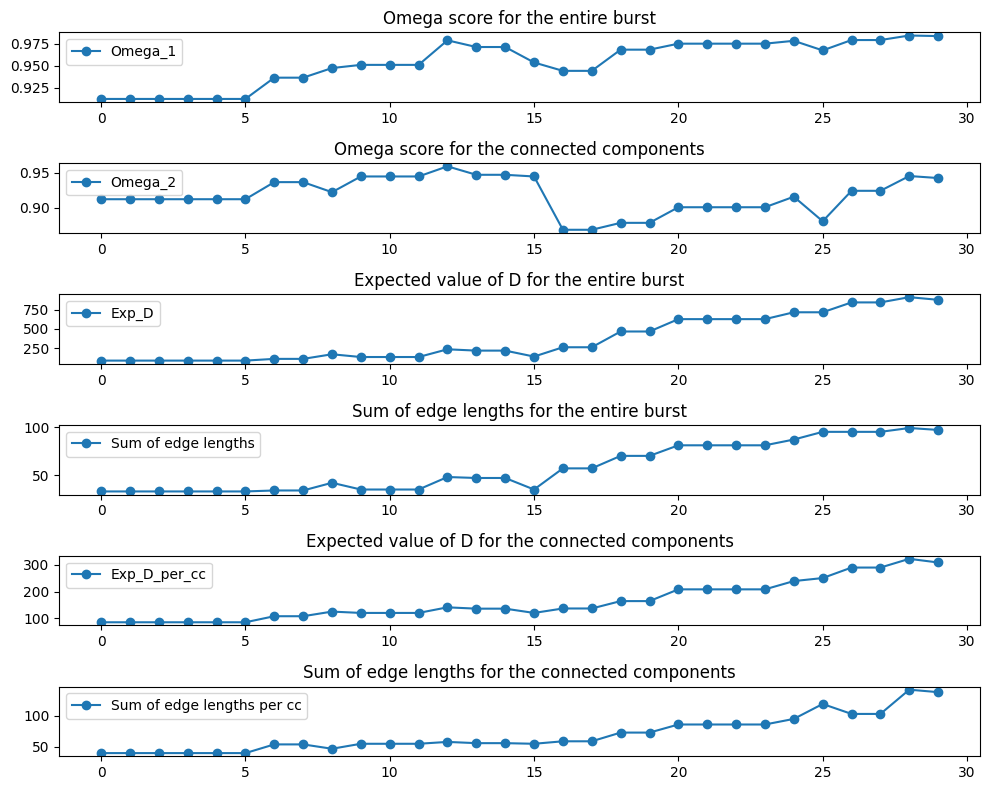

In [9]:
import matplotlib.pyplot as plt

# Unpacking the tuples into separate lists for each element
Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual = zip(*info)

# Plotting each element on a separate subplot
fig, axs = plt.subplots(6, 1, figsize=(10, 8))

axs[0].plot(Omega_1, '-o', label='Omega_1')
axs[0].set_title('Omega score for the entire burst')
axs[0].legend()

axs[1].plot(Omega_2, '-o', label='Omega_2')
axs[1].set_title('Omega score for the connected components')
axs[1].legend()

axs[2].plot(Dr_1, '-o', label='Exp_D')
axs[2].set_title('Expected value of D for the entire burst')
axs[2].legend()

axs[3].plot(D, '-o', label='Sum of edge lengths')
axs[3].set_title('Sum of edge lengths for the entire burst')
axs[3].legend()

axs[4].plot(Dr_2, '-o', label='Exp_D_per_cc')
axs[4].set_title('Expected value of D for the connected components')
axs[4].legend()

axs[5].plot(Dr_2_actual, '-o', label='Sum of edge lengths per cc')
axs[5].set_title('Sum of edge lengths for the connected components')
axs[5].legend()
plt.tight_layout()
plt.show()

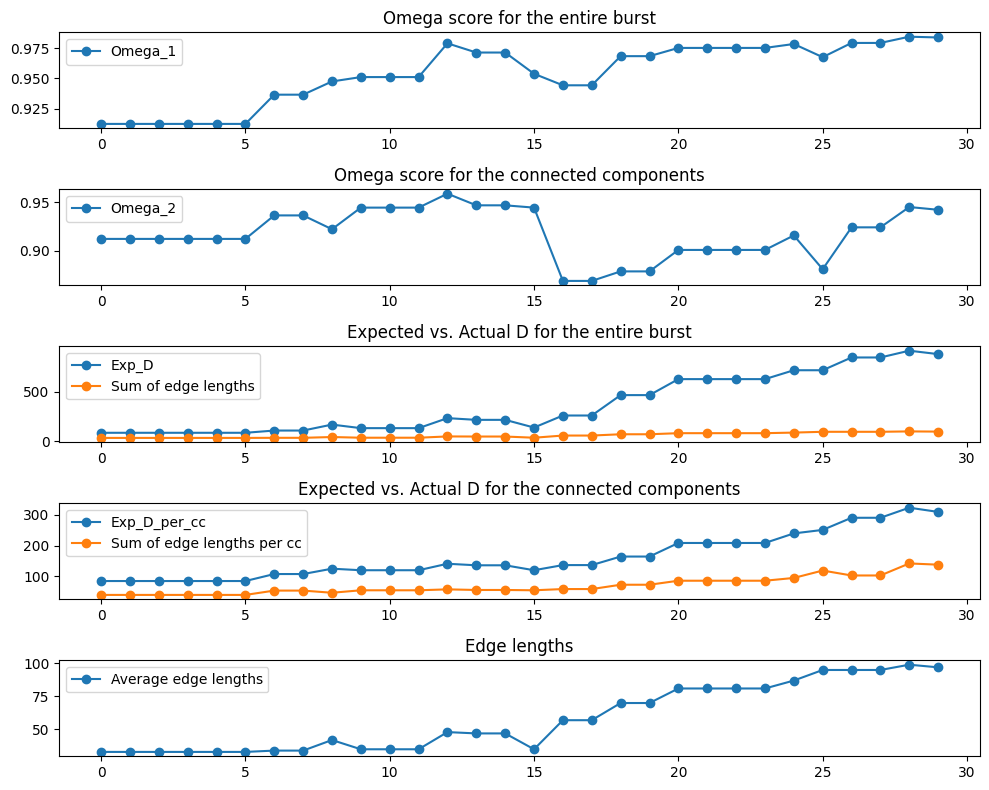

In [10]:
import matplotlib.pyplot as plt

# Unpacking the tuples into separate lists for each element
Omega_1, Omega_2, Dr_1, D, Dr_2, Dr_2_actual = zip(*info)

# Plotting each element on a separate subplot, combining Exp_D and Sum of edge lengths on the same plots for comparison
fig, axs = plt.subplots(5, 1, figsize=(10, 8))  # Reduced to 4 subplots

axs[0].plot(Omega_1, '-o', label='Omega_1')
axs[0].set_title('Omega score for the entire burst')
axs[0].legend()

axs[1].plot(Omega_2, '-o', label='Omega_2')
axs[1].set_title('Omega score for the connected components')
axs[1].legend()

# Combining Exp_D and Sum of edge lengths for the entire burst on the same subplot
axs[2].plot(Dr_1, '-o', label='Exp_D')
axs[2].plot(D, '-o', label='Sum of edge lengths')
axs[2].set_title('Expected vs. Actual D for the entire burst')
axs[2].legend()

# Combining Exp_D_per_cc and Sum of edge lengths per cc for the connected components on the same subplot
axs[3].plot(Dr_2, '-o', label='Exp_D_per_cc')
axs[3].plot(Dr_2_actual, '-o', label='Sum of edge lengths per cc')
axs[3].set_title('Expected vs. Actual D for the connected components')
axs[3].legend()

axs[4].plot(edge_lengths, '-o', label='Average edge lengths')
axs[4].set_title('Average edge lengths')
axs[4].legend()

plt.tight_layout()
plt.show()

In [14]:
with open ("test.txt", "w") as f:
    for hv in list_hv:
        for number in hv:
            f.write(str(number))
            f.write("\t")
        f.write("\n")


errlist = lal.io.check_correctness_treebank("test.txt")
for err in errlist:
    print(err)

(9, Error: Wrong number of roots: 2.)
(9, Error: Wrong number of edges. Number of vertices is '23'. Number of edges is '21'; should be '22'.)
(10, Error: Wrong number of roots: 3.)
(10, Error: Vertex '19' is isolated.)
(10, Error: Vertex '20' is isolated.)
(10, Error: Wrong number of edges. Number of vertices is '21'. Number of edges is '18'; should be '20'.)
(11, Error: Wrong number of roots: 3.)
(11, Error: Vertex '19' is isolated.)
(11, Error: Vertex '20' is isolated.)
(11, Error: Wrong number of edges. Number of vertices is '21'. Number of edges is '18'; should be '20'.)
(12, Error: Wrong number of roots: 3.)
(12, Error: Vertex '19' is isolated.)
(12, Error: Vertex '20' is isolated.)
(12, Error: Wrong number of edges. Number of vertices is '21'. Number of edges is '18'; should be '20'.)
(13, Error: Wrong number of roots: 2.)
(13, Error: Wrong number of edges. Number of vertices is '27'. Number of edges is '25'; should be '26'.)
(14, Error: Wrong number of roots: 2.)
(14, Error: Wro

In [ ]:
# def get_mhd(list_hv, batch_size=100):
#     list_mhd = []
#     for i in range(0, len(list_hv), batch_size):
#         batch = list_hv[i:i+batch_size]
#         for hv in batch:
#             try:
#                 rt = lal.graphs.from_head_vector_to_rooted_tree(hv)
#                 mhd = lal.properties.mean_hierarchical_distance(rt)
#                 list_mhd.append(mhd)
#             except Exception as e:
#                 print(f"Error processing item {hv}: {e}")
#                 # Optionally, append a default value or continue
#                 # list_mhd.append(default_value)
#                 continue
#     return list_mhd

# # list_hv = [...]  # Assuming this is defined somewhere in your notebook
# list_mhd = get_mhd(list_hv)
# print(list_mhd)

In [8]:
# import lal
# def fluxes(list_hv):
#     for hv in list_hv[:1]:
#         rt = lal.graphs.from_head_vector_to_rooted_tree(hv)
#         # calculate the fluxes
#         fluxes = lal.linarr.compute_flux(rt)
#         number_of_fluxes = len(fluxes)
#         # print the fluxes
#         for i in range(0, number_of_fluxes):
#             print("Flux", i+1)
#             print(" Dependencies:", fluxes[i].get_dependencies())
#             print(" Left span:", fluxes[i].get_left_span())
#             print(" Right span:", fluxes[i].get_right_span())
#             print(" Weight:", fluxes[i].get_weight())
#             print(" R/L ratio:", fluxes[i].get_RL_ratio())
#             print(" W/S ratio:", fluxes[i].get_WS_ratio())

# fluxes(list_hv)